## Import

In [29]:
# Import pandas
import pandas as pd
import math
from copy import deepcopy
from itertools import permutations
from sys import maxsize
from matplotlib import pyplot as plt

## Class

### State

In [30]:
class State:
  def __init__(self, p_name, p_latitude, p_longitude):
    self.m_name = p_name
    self.m_latitude = p_latitude
    self.m_longitude = p_longitude
  
    return
  
  def __str__(self):
    return f"{self.m_name:<12} {self.m_latitude:<10} {self.m_longitude:<12}"
    #return "N:" + self.m_name + ", LA:" + str(self.m_latitude) + ", LO:" + str(self.m_longitude)

### TSP

In [31]:
class TSP:
  def __init__(self, p_distanceMatrix=[]):
    self.m_distanceMatrix = p_distanceMatrix

  def TSP_BruteForce(self, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(len(self.m_distanceMatrix)):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    path = []

    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += self.m_distanceMatrix[k][j]
            k = j
        current_pathweight += self.m_distanceMatrix[k][s]
 
        # update minimum
        if min(min_path, current_pathweight) != min_path:
          path = deepcopy(i)
          min_path = min(min_path, current_pathweight)
    
    path = list(path)
    path.insert(s, 0)
    path.append(s)
    return (path, min_path)

  def TSP_MST(self, s):
    array = []
    size = len(self.m_distanceMatrix)
    unvisitedList = [i for i in range(size)]
    
    unvisitedList.remove(s)
    array.append(s)
    
    currentNode = s
    currentPathWeight = 0

    while len(unvisitedList) != 0:
      min_path = maxsize
      min_node = -1

      for i in unvisitedList:
        if min(min_path, self.m_distanceMatrix[currentNode][i]) != min_path:
          min_path = self.m_distanceMatrix[currentNode][i]
          min_node = i

      currentNode = min_node
      currentPathWeight += min_path

      unvisitedList.remove(min_node)
      array.append(min_node)

    currentPathWeight += self.m_distanceMatrix[currentNode][s]
    array.append(s)

    return (array, currentPathWeight)

## Function

### Utility Functions

In [32]:
# Generates States Object List given a 2d list of data
# param: p_data <List of List containing tokenized csv data
# return: sList <List of State Object>
def GenerateStatesList(p_data):
  sList = []
  for i in data:
    s = State(i[0], i[2], i[3])
    sList.append(s)
  return sList


# Prints States
# param: statesList <Array of State Objects>
def PrintStates(p_stateList):
  print("State        Latitude   Longitude\n")
  for i in p_stateList:
    print(i)
  return

 #Calculates and returns Euclidean Distance
# param: x <State Object>, y <State Object>
# return: distance <float>
def EuclideanDistance(p_x, p_y):
  a = math.pow(p_x.m_latitude -  p_y.m_latitude, 2)
  b = math.pow(p_x.m_longitude - p_y.m_longitude, 2)

  return math.sqrt(a + b)

def GenerateDistanceMatrix(p_statesList):
  dMatrix = []
  for ci, i in enumerate(p_statesList):
    dMatrix.append([])
    for cj, j in enumerate(p_statesList):
      d = EuclideanDistance(i, j)
      dMatrix[ci].append(d)
  
  return dMatrix


def PrintDistanceMatrix(p_distanceMatrix):
  print("     ",end="")
  for i in range(len(p_distanceMatrix)):
    print(f"{i:<8}", end=" ")
  print()

  for index, row in enumerate(p_distanceMatrix):
    print(f"{index}", end="    ")
    for i in row:
      print(f"{i:<8.3f}", end=" ")
    print()
  
  return

def DistanceMatrixToCSV(p_distanceMatrix):
  print(end=",")

  for i in range(len(p_distanceMatrix)):
    print(i, end=",")
  print()

  for ci, i in enumerate(p_distanceMatrix):
    print(ci, end=",")
    for j in i:
      print(j, end=",")
    print()

# Given an array of indices representing a path, and given an array of States...
# draw a graph
def DrawGraph(p_indicesList, p_statesList):
  plt.rcParams["figure.figsize"] = [10, 8]
  plt.rcParams["figure.autolayout"] = True
  fig = plt.figure()
  ax = fig.add_subplot()

  for ci, i in enumerate(p_indicesList):
    if ci == 0:
      x = i
    else:
      plt.text(p_statesList[i].m_latitude + 0.35, p_statesList[i].m_longitude, str(i), ha='left',size=12,color= 'blue') 
      
      y = i

      latitude = [p_statesList[x].m_latitude, p_statesList[y].m_latitude]
      longitude = [p_statesList[x].m_longitude, p_statesList[y].m_longitude]

      ax.plot(latitude, longitude, color='black')
      ax.scatter(latitude, longitude, c='red', s=100)
      
      x = y

  plt.show()
  return

# New Section

In [33]:
# def DFS(graph,s):
#   graphSize = len(graph)
#   print(graphSize)

#   nodeList = [i for i in range(graphSize)]
#   nodeList.remove(s)

#   visitedList = [s]

#   print(nodeList, visitedList)
#   return

## Main

In [34]:
# Configurable Variables
DATASIZE = 10   #YOUR SIZE

In [35]:
data = pd.read_csv("city_data_50.csv", index_col=None, header=0, engine='python')
data = data.values.tolist()

In [36]:
data = data[:DATASIZE]
statesList = GenerateStatesList(data)
PrintStates(statesList)

State        Latitude   Longitude

Alabama      32.377716  -86.300568  
Alaska       58.301598  -134.420212 
Arizona      33.448143  -112.096962 
Arkansas     34.746613  -92.288986  
California   38.576668  -121.493629 
Colorado     39.739227  -104.984856 
Connecticut  41.764046  -72.682198  
Delaware     39.157307  -75.519722  
Hawaii       21.307442  -157.857376 
Florida      30.438118  -84.281296  


In [37]:
distanceMatrix = GenerateDistanceMatrix(statesList)
print("Rows are source")
print("Columns are destination")
PrintDistanceMatrix(distanceMatrix)

Rows are source
Columns are destination
     0        1        2        3        4        5        6        7        8        9        
0    0.000    54.658   25.819   6.440    35.735   20.082   16.540   12.735   72.408   2.800    
1    54.658   0.000    33.407   48.269   23.583   34.799   63.915   61.934   43.793   57.361   
2    25.819   33.407   0.000    19.850   10.705   9.495    40.282   37.020   47.344   27.978   
3    6.440    48.269   19.850   0.000    29.455   13.642   20.825   17.340   66.931   9.093    
4    35.735   23.583   10.705   29.455   0.000    16.550   48.915   45.978   40.256   38.092   
5    20.082   34.799   9.495    13.642   16.550   0.000    32.366   29.471   55.993   22.697   
6    16.540   63.915   40.282   20.825   48.915   32.366   0.000    3.853    87.597   16.212   
7    12.735   61.934   37.020   17.340   45.978   29.471   3.853    0.000    84.250   12.361   
8    72.408   43.793   47.344   66.931   40.256   55.993   87.597   84.250   0.000    74.140   


In [38]:
nList = [i for i in range(6)]

#DFS(nList, 0)

tsp = TSP(distanceMatrix)

## Minimum Spanning Tree Methods

Path: [0, 9, 3, 5, 2, 4, 1, 8, 7, 6, 0] 
Minimum Distance: 217.755577110312


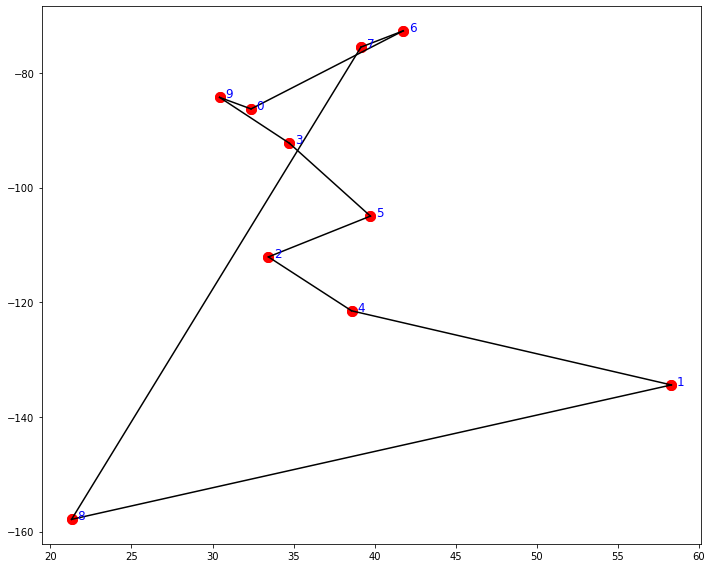

In [39]:
MST_path, MST_distance = tsp.TSP_MST(0)
print("Path:",MST_path, "\nMinimum Distance:",MST_distance)
DrawGraph(MST_path, statesList)

## Brute Force Method

Path: [0, 3, 2, 4, 8, 1, 5, 6, 7, 9, 0] 
Minimum Distance: 207.2243866650595


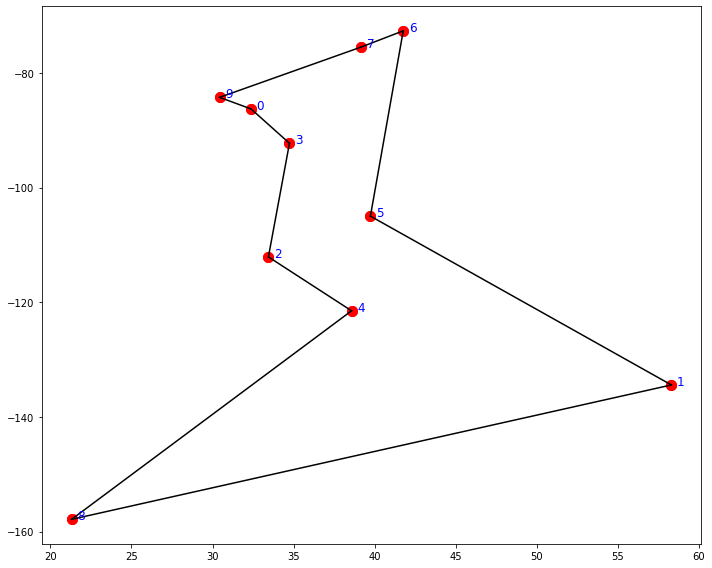

In [40]:
BFM_path, BFM_distance = tsp.TSP_BruteForce(0)
print("Path:",BFM_path, "\nMinimum Distance:",BFM_distance)
DrawGraph(BFM_path, statesList)

## Random

In [41]:
# Another method is to make two MST, one goes for the best path,
# then another chooses the second best path,
# followed by the next nodes, will find the shortest distance
# when reached till no paths are met, we will combine the path
# to make a single path

In [42]:
# What is BFS, is actually start with one node, then start with two
# and gradually increase amount of nodes, while investigating on the
# the min path distance

# what if, another is to look through all, then enqueue
# then remove half of queue



In [43]:
# What if DFS, is actually, go through all nodes, then backtrack

In [44]:
# create a tree that can help with searching and pathfinding

In [45]:
# Goal 22-05-18
# Create a DFS and BFS algorithm to search for the path with the least distance taken for the TSP problem
# when possible, learn to understand how to create an A* pathfinding algorithm
# JUST CREATE THE ALGORITHM. DO NOT OVERTHINK ABOUT DOING THIS. IT DOES NOT HELP TO OVERTHINK ABOUT IT.

# DFS AND BFS, WILL TAKE O(n!). IT IS JUST MEANT TO TAKE THIS LONG GIVEN BY HOW THE SCENARIO IS LIKE
# WE WILL BE USING A LIST OF NODES AND UNVISITED NODES TO KEEP TRACK OF THE STATES


# WITH ADDITIONAL TIME, IT MAY BE REQUIRE TO CREATE A TREE TO SPEED UP TIME EFFICNECY AND SPACE EFFICIENCY

In [46]:

# class Node:
#   def __init__(self, p_data : int, p_children=[]): #an array of Nodes
#     self.m_data = p_data
#     self.m_children = p_children

#   def __str__(self):
#     return "Node #:" + str(self.m_data)

# class Tree:
#   def __init__(self, p_distanceMatrix):
#     self.m_root = None
#     self.m_distanceMatrix = p_distanceMatrix

  
#   def createTree(self):
#     size = len(self.m_distanceMatrix) # Number of cities 3

#     nodeList = [i for i in range(size)]


#     num = 0
#     nodeList.remove(num)
#     self.m_root = Node(num)

#     for i in nodeList:
#       self.m_root.m_children.append(Node(i))
    
#     for i in self.m_root.m_children:
#       print(i)
      



#   def createTree_Aux(self, p_node: Node, p_index : int):
#     nList = deepcopy(p_node.m_children)

#     for i in nList:
#       nNode = Node(i)

#     return

# Create initial node, store data and its children
# Loop through the childrens list
  # per iteration in loop, create node and store its new children 

# t = Tree(distanceMatrix)
# t.createTree()

# eee

In [47]:
# p_distanceMatrix = the Distance Matrix
# p_start = the starting point
# class Test:
#   def __init__(self, p_distance=[]):
#     self.m_distanceMatrix = p_distance
#     return

#   def TSP_DFS(self,  p_start):
#     size = len(self.m_distanceMatrix)

#     nodeList = [i for i in range(size)]
#     previousNode = None
#     currentNode = p_start
#     nodeList.remove(currentNode)
#     visitedList = [currentNode]

#     minDistance = maxsize
#     currentPath = 0
    
#     newNodeList = [i for i in nodeList]
#     newVisitedList = [i for i in visitedList]

#     for i in newNodeList:
#       previousNode = currentNode
#       currentNode = i
#       newNodeList.remove(currentNode)
#       newVisitedList.append(currentNode)
#       currentPath += self.m_distanceMatrix[previousNode][currentNode]
      
      
      
      
      



#     return

#   def TSP_DFS_Aux(self, node, visitedList):
#     visitedList[node] = True
    
#     newVisitedList
#     i = 1


# t = Test(distanceMatrix)


In [49]:
def create_string(p_size):
    myString = ""
    for i in range(p_size):
        myString += str(i)
    return myString


class Node:
  def __init__(self, p_data):
    self.m_data = p_data
    self.m_nodeList = []

  def __str__(self):
      return str(self.m_data)

class Tree:
  def __init__(self, p_distanceMatrix):
    self.m_root = None
    self.m_distanceMatrix = p_distanceMatrix
    self.m_height = len(self.m_distanceMatrix)
  
  def create_tree(self):
    dataString = create_string(self.m_height)
    nodeValue = dataString[0]
    dataString = dataString.replace(nodeValue, "")
    node = Node(int(nodeValue))

    self.m_root = node

    newDataString = (dataString + '.')[:-1]

    for i in newDataString:
      self.create_tree_aux(self.m_root, newDataString, i)
  
  def create_tree_aux(self, p_currentNode, p_dataString, p_index):
    newDataString = (p_dataString + '.')[:-1]
    newDataString = newDataString.replace(p_index, "")
    node = Node(int(p_index))
    p_currentNode.m_nodeList.append(node)

    currentNode = node

    for i in newDataString:
      self.create_tree_aux(currentNode, newDataString, i)
    
    return

TREE = Tree(distanceMatrix)
TREE.create_tree()
print(TREE.m_height, DATASIZE)


10 10
